<a href="https://colab.research.google.com/github/Shanthan0/Python/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 15: Diamond Price Prediction 

---

### Context

Diamond is one of the precious stones which are always in huge demand in the investment market. Diamonds are also used in many industrial applications like cutting but it is mostly used as a gemstone. The actual price of a diamond however is determined by a gemologist after examining its various features such as its carat, cut, color, and clarity. Dimensions of a diamond is also a very important parameter to determine its worth. Nearly, 142 million carats of diamonds were produced worldwide in 2019 alone. This makes it very important to come up with some smart technique to estimate its worth. 




 
 

---

### Problem Statement

A diamond distributor decided to put almost 2000 diamonds for auction. A jewellery company is interested in making a bid to purchase these diamonds in order to expand their business. As a data scientist, your job is to build a prediction model to predict the price of diamonds so that your company knows how much it should bid.













---

### Data Description

The **diamonds** dataset contains the prices and other attributes of almost 54,000 diamonds. Following are the attributes:  


|Column|Description|
|---:|:---|
|`carat`|weight of the diamond|
|`cut`|quality of the cut|
|`color`|diamond colour, from J (worst) to D (best)|
|`clarity`|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|`table`|The width of the diamond's table expressed as a percentage of its average diameter|
|`price`|price in US dollars|
|`x`|length in mm|
|`y`|width in mm|
|`z`|depth in mm|
|`depth`|total depth percentage = $\frac{2z}{x + y}$|

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv


---

### Things To Do

1. Explore the diamond dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes.

3. Create a correlation heatmap for all the columns.

4. Build a linear regression model by selecting the most relevant features to predict the price of diamonds.

5. Reduce multicollinearity (if exists) by eliminating highly correlated and high VIF features.

5. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

Link to the dataset: https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv


In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Get the information on DataFrame.
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# Drop 'Unnamed: 0' column as it is of no use
df.drop(columns = 'Unnamed: 0',inplace = True)

---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


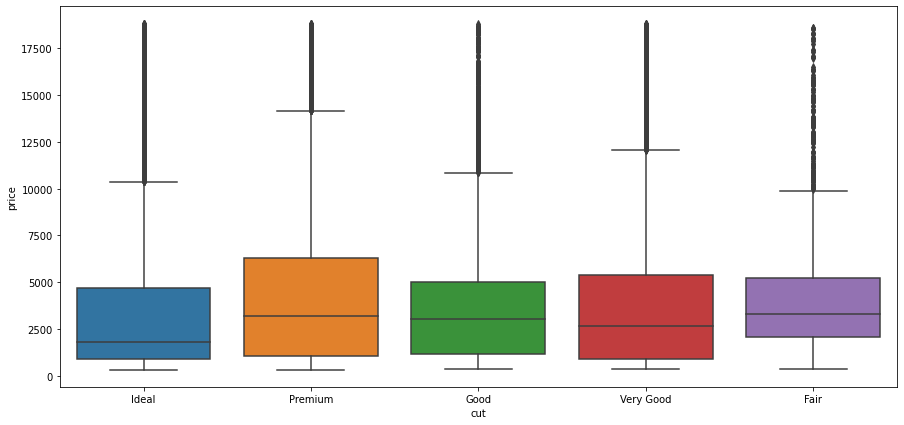

In [ ]:
# Boxplot for 'cut' vs 'price'

plt.figure(figsize = (15,7))
sns.boxplot(x = 'cut',y = 'price', data = df)
plt.show()

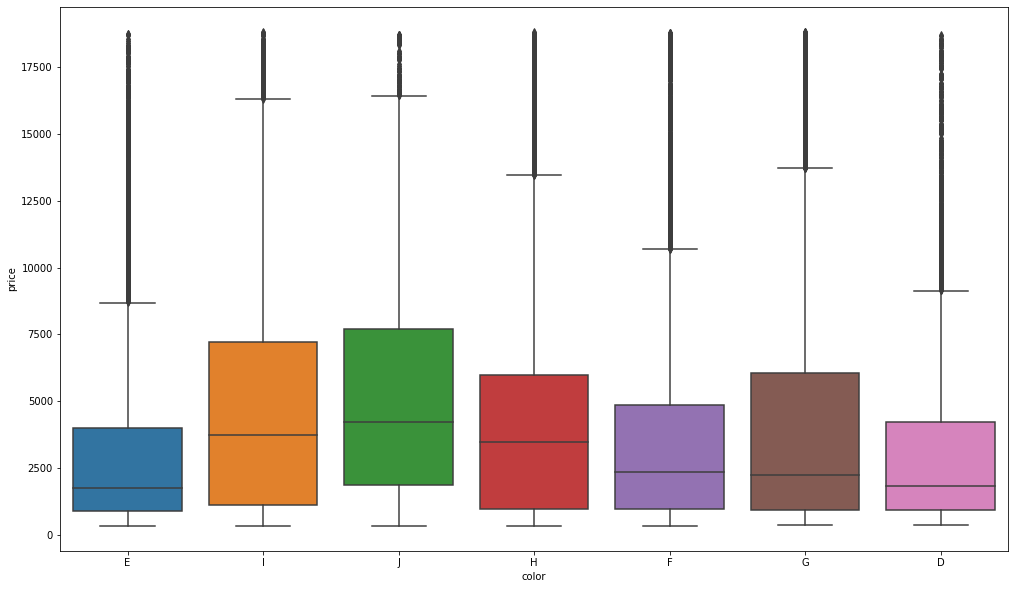

In [ ]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize = (17,10))
sns.boxplot(x = 'color',y = 'price', data = df)
plt.show()

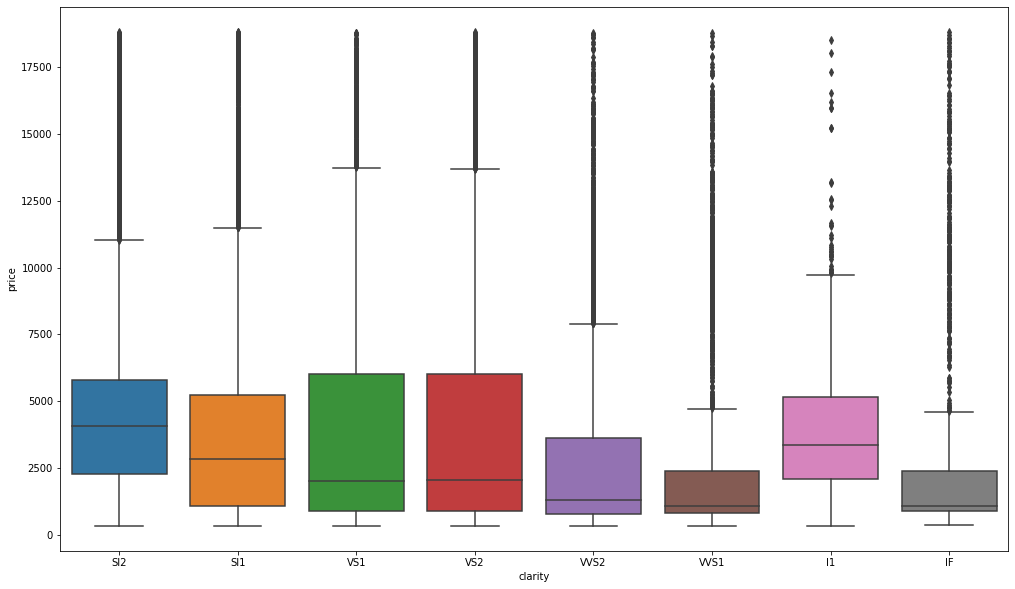

In [ ]:
# Boxplot for 'clarity' vs 'price'
plt.figure(figsize = (17,10))
sns.boxplot(x = 'clarity',y = 'price', data = df)
plt.show()

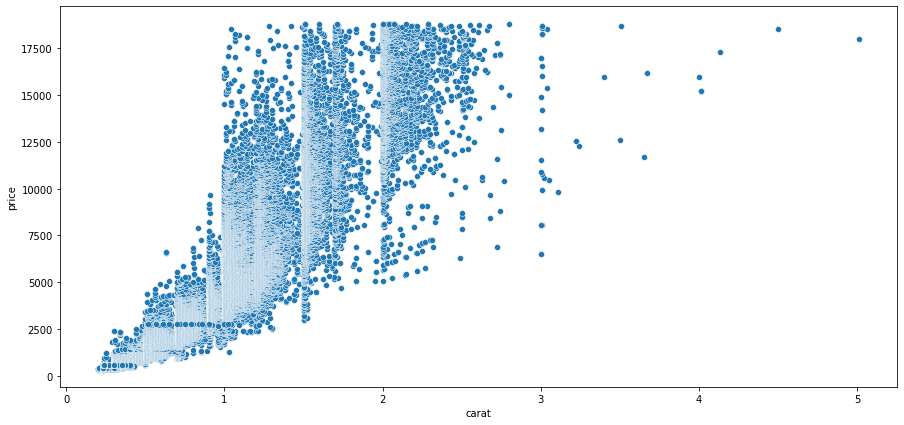

In [ ]:
# Create scatter plot with 'carat' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'carat',y = 'price', data = df)
plt.show()


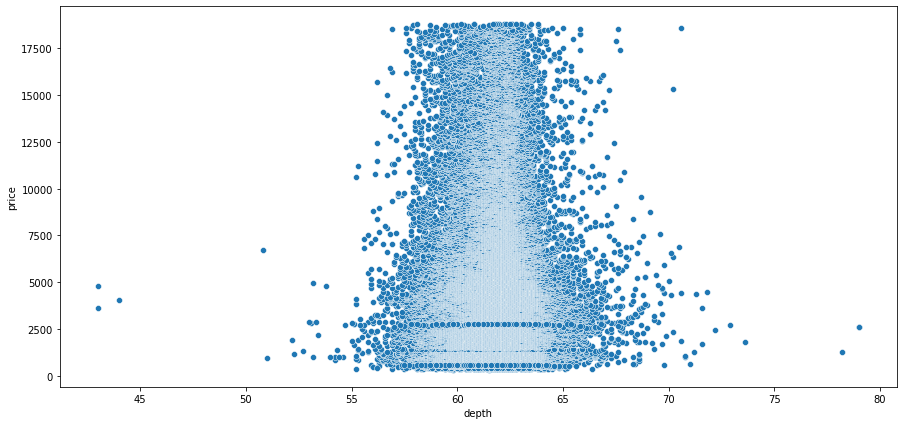

In [ ]:
# Create scatter plot with 'depth' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'depth',y = 'price', data = df)
plt.show()

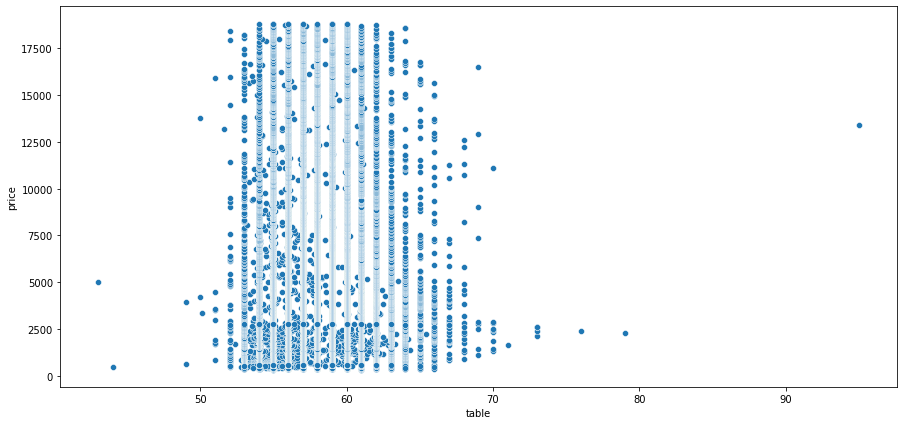

In [ ]:
# Create scatter plot with 'table' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'table',y = 'price', data = df)
plt.show()

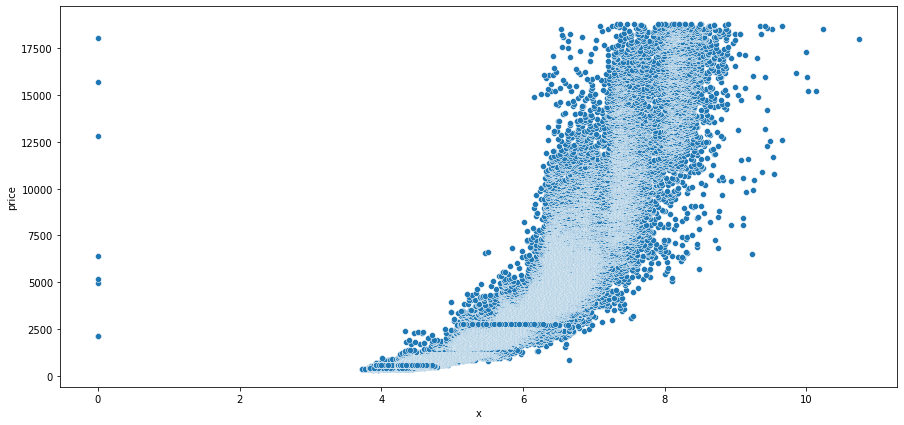

In [ ]:
# Create scatter plot with attribute 'x' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'x',y = 'price', data = df)
plt.show()

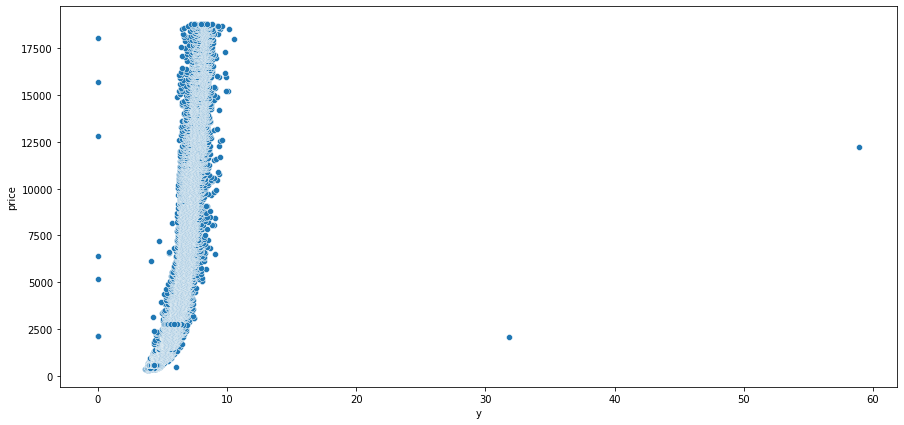

In [ ]:
# Create scatter plot with attribute 'y' on X-axis and 'price' on Y-axis

plt.figure(figsize = (15,7))
sns.scatterplot(x = 'y',y = 'price', data = df)
plt.show()

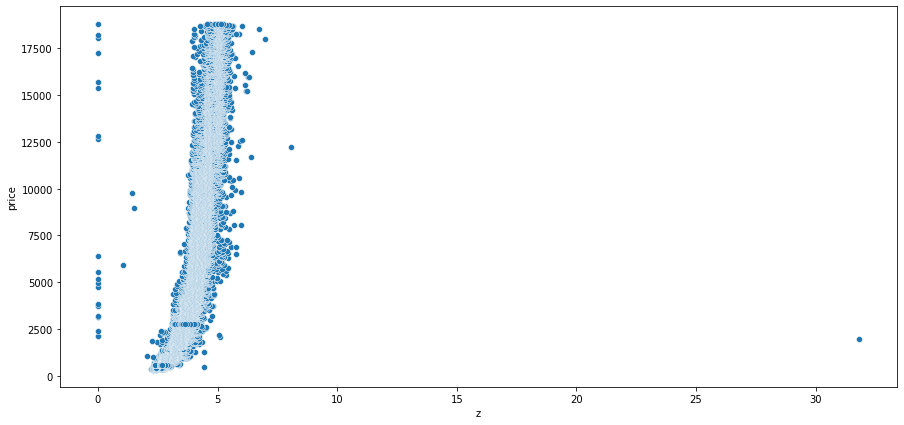

In [ ]:
# Create scatter plot with 'z' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'z',y = 'price', data = df)
plt.show()

**Q:** Which attribute exhibit the best linear relationship with the target variable `price`?

**A:** carat

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


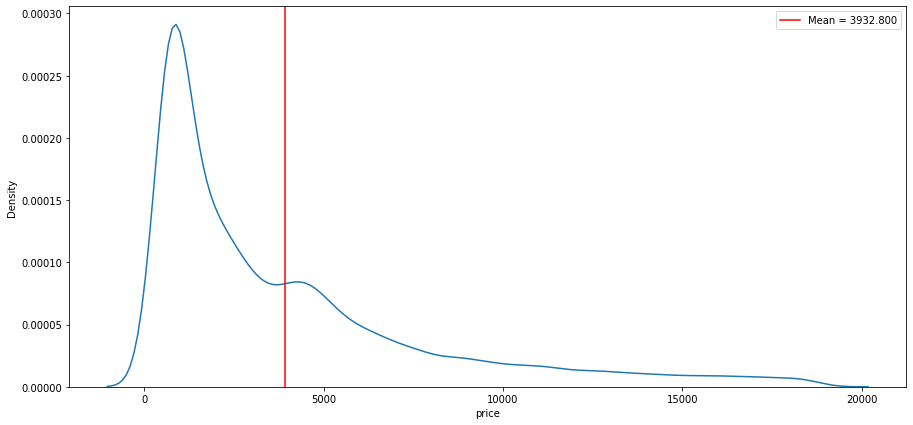

In [ ]:

# Create a normal distribution curve for the `price`.

plt.figure(figsize = (15,7))
sns.distplot(df['price'],bins = 'sturges',hist = False)
mean = np.mean(df['price'])
plt.axvline(np.mean(df['price']),color = 'red',label = f'Mean = {mean:.3f}')
plt.legend()
plt.show()

**Q:** What is the mean `price` of diamonds ?

**A:** 3932.8



---

#### 3. Feature Engineering

The dataset contains certain features that are categorical.  To convert these features into numerical ones, use `replace()` function of the DataFrame. 

**For example:** 

`df["column1"].replace({"a": 1, "b": 0}, inplace=True)` $\Rightarrow$ replaces all the `'a'` values with `1` and `'b'` values with `0` for feature `column1`. Use `inplace` boolean argument to to make changes in the DataFrame permanently.

Replace following values for `cut` column:

 - `Fair` with `1`
 - `Good` with `2`
 - `Very Good` with `3` 
 - `Premium` with `4`
 - `Ideal` with `5`

Replace following values for the `color` column:

- `D` with `1`
- `E` with `2`
- `F` with `3`
- `G` with `4`
- `H` with `5`
- `I` with `6`

Replace following values for the `clarity` column:

- `I1` with `1` 
- `SI2` with `2`
- `SI1` with `3`
- `VS2` with `4`
- `VS1` with `5`
- `VVS2` with `6`
- `VVS1` with `7`
- `IF` with `8`

In [ ]:
# Replace values of 'cut' column
df['cut'].replace({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5},inplace = True)

In [ ]:
# Replace values of 'color' column
df['color'].replace({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7},inplace = True)

In [ ]:
# Replace values of 'clarity' column
df['clarity'].replace({'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8},inplace = True)

---

#### 4. Model Training 

Build a multiple linear regression model  using all the features of the dataset. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.


In [ ]:
# Create a list of feature variables.
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']

In [ ]:
# Build multiple linear regression model using all the features
from sklearn.model_selection import train_test_split


# Split the DataFrame into the train and test sets such that test set has 33% of the values.
x = df[features]
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# Build linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# Print the value of the intercept
print('Intercept:',lr.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
for i in range(len(features)):
  print(f'{features[i]} : {lr.coef_[i]}')

Intercept: 5255.758656295189
carat : 10697.326826785507
cut : 120.52132279572493
color : -324.1278076205767
clarity : 504.0939000224332
depth : -78.64608396144256
table : -27.508016593429716
x : -842.4215447936176
y : 25.329777298852548
z : -23.67989821204219


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.

y_train_reshaped = y_train.values.reshape(-1,1)
y_train_predict = lr.predict(x_train)
y_test_reshaped = y_test.values.reshape(-1,1)
y_test_predict = lr.predict(x_test)
print('Train Dataset')
print(f'R square: {r2_score(y_train_reshaped,y_train_predict):3f}')
print(f'MSE: {mean_squared_error(y_train_reshaped,y_train_predict):3f}')
print(f'MAE: {mean_absolute_error(y_train_reshaped,y_train_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_reshaped,y_train_predict)):3f}')

print('\nTest Dataset')
print(f'R square: {r2_score(y_test_reshaped,y_test_predict):3f}')
print(f'MSE: {mean_squared_error(y_test_reshaped,y_test_predict):3f}')
print(f'MAE: {mean_absolute_error(y_test_reshaped,y_test_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_reshaped,y_test_predict)):3f}')

Train Dataset
R square: 0.906798
MSE: 1495991.515915
MAE: 809.686798
RMSE: 1223.107320

Test Dataset
R square: 0.907482
MSE: 1442900.014820
MAE: 802.201485
RMSE: 1201.207732


**Q:** What is the $R^2$ (R-squared) value for this model?

**A:** 0.91



---

### 5. Dealing with Multicollinearity

Create a heatmap among all variables to identify a set of features which are highly correlated with each other.


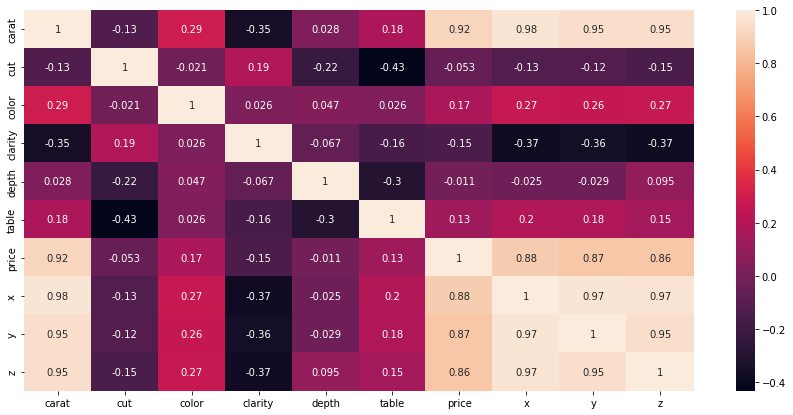

In [ ]:
# Heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

**Q:** Which features are highly correlated with `price`?

**A:** carat, x, y, z

**Q:** Is there multicollinearity in the dataset?

**A:** Yes

Let's consider the feature `carat` as it is highly correlated with the target variable `price`. Perform the following tasks:
1. Drop the features which are highly correlated with `carat`.
2. Calculate VIF (Variance Inflation Factor) for the remaining features.


In [ ]:
# Drop features highly correlated with 'carat'
features.remove('carat')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into the train and test sets such that test set has 33% of the values.
x = df[features]
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# Build linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# Print the value of the intercept
print('Intercept:',lr.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
for i in range(len(features)):
  print(f'{features[i]} : {lr.coef_[i]}')

Intercept: -25351.83028475506
cut : 124.6114946974551
color : -247.20700453293486
clarity : 542.3814536002968
depth : 120.26188823374186
table : -7.4753904221928025
x : 3386.3587124988576
y : 177.64702091297582
z : 20.047994672600673


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
y_train_reshaped = y_train.values.reshape(-1,1)
y_train_predict = lr.predict(x_train)
y_test_reshaped = y_test.values.reshape(-1,1)
y_test_predict = lr.predict(x_test)
print('Train Dataset')
print(f'R square: {r2_score(y_train_reshaped,y_train_predict):3f}')
print(f'MSE: {mean_squared_error(y_train_reshaped,y_train_predict):3f}')
print(f'MAE: {mean_absolute_error(y_train_reshaped,y_train_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_reshaped,y_train_predict)):3f}')

print('\nTest Dataset')
print(f'R square: {r2_score(y_test_reshaped,y_test_predict):3f}')
print(f'MSE: {mean_squared_error(y_test_reshaped,y_test_predict):3f}')
print(f'MAE: {mean_absolute_error(y_test_reshaped,y_test_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_reshaped,y_test_predict)):3f}')


Train Dataset
R square: 0.833177
MSE: 2677686.008646
MAE: 1228.510482
RMSE: 1636.363654

Test Dataset
R square: 0.832263
MSE: 2616017.190728
MAE: 1226.559880
RMSE: 1617.410644


Now eliminate the features having VIF values above 10 (if any).

In [ ]:
# Calculate the VIF values for the remaining features using the 'variance_inflation_factor' function.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Add a constant to feature variables 
import statsmodels.api as sm
x_train_1 = sm.add_constant(x_train)

# Create a dataframe that will contain the names of the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = x_train_1.columns
vif['VIF'] = [variance_inflation_factor(x_train_1.values,i) for i in range(x_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False) 
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,features,VIF
0,const,5725.43
6,x,31.17
7,y,18.33
8,z,17.55
5,table,1.58
4,depth,1.56
1,cut,1.48
3,clarity,1.22
2,color,1.11


**Q**: Which of the features have VIF values above 10?

**A**: constant, x, y, z

Proceed with the below 4 code cells only if any of the features have VIF value above 10, otherwise jump to **6. Residual (Error) Analysis** section.  

In [ ]:
# Create a list of features having VIF values less than 10 
features = ['table','depth','cut','clarity','color']

In [ ]:
# Again build a linear regression model using the features whose VIF values are less than 10 

# Split the DataFrame into the train and test sets such that test set has 33% of the values.
x = df[features]
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# Build linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# Print the value of the intercept
print('Intercept:',lr.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
for i in range(len(features)):
  print(f'{features[i]} : {lr.coef_[i]}')


Intercept: -10977.743280427188
table : 200.93833402975866
depth : 47.17102455081881
cut : 89.09662552425914
clarity : -330.8263958872773
color : 406.85836396750153


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.

y_train_reshaped = y_train.values.reshape(-1,1)
y_train_predict = lr.predict(x_train)
y_test_reshaped = y_test.values.reshape(-1,1)
y_test_predict = lr.predict(x_test)

print('Train Dataset')
print(f'R square: {r2_score(y_train_reshaped,y_train_predict):3f}')
print(f'MSE: {mean_squared_error(y_train_reshaped,y_train_predict):3f}')
print(f'MAE: {mean_absolute_error(y_train_reshaped,y_train_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train_reshaped,y_train_predict)):3f}')

print('\nTest Dataset')
print(f'R square: {r2_score(y_test_reshaped,y_test_predict):3f}')
print(f'MSE: {mean_squared_error(y_test_reshaped,y_test_predict):3f}')
print(f'MAE: {mean_absolute_error(y_test_reshaped,y_test_predict):3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_reshaped,y_test_predict)):3f}')

Train Dataset
R square: 0.061749
MSE: 15059900.659322
MAE: 2874.081081
RMSE: 3880.708783

Test Dataset
R square: 0.066084
MSE: 14565314.499381
MAE: 2829.325115
RMSE: 3816.453131


In [ ]:
# Again calculate the VIF values for the remaining features to find out if there is still multicollinearity
x_train_1 = sm.add_constant(x_train)

# Create a dataframe that will contain the names of the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = x_train_1.columns
vif['VIF'] = [variance_inflation_factor(x_train_1.values,i) for i in range(x_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False) 
vif

,features,VIF
0,const,5278.42
1,table,1.55
3,cut,1.48
2,depth,1.32
4,clarity,1.05
5,color,1.01


---

#### 6. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not (which is one of the assumption of linear regression). For this, plot the  histogram of the residuals.

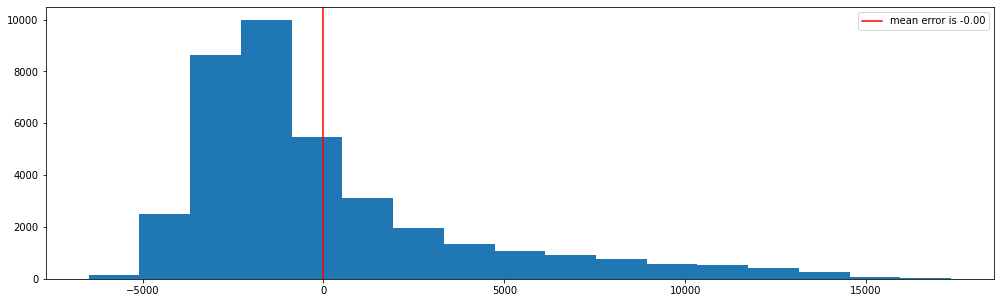

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.

y_train_error = y_train_reshaped - y_train_predict.reshape(-1,1)
plt.figure(figsize = (17,5))
plt.hist(y_train_error,bins = 'sturges')
plt.axvline(np.mean(y_train_error),color = 'red',label = f'mean error is {np.mean(y_train_error):.2f}')
plt.legend()
plt.show()


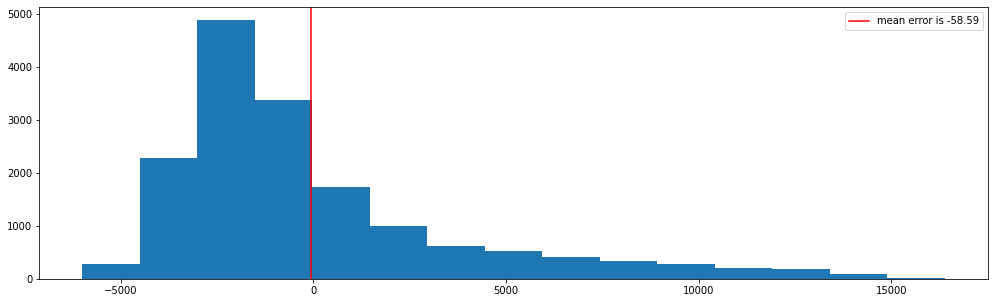

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
y_test_error = y_test_reshaped - y_test_predict.reshape(-1,1)
plt.figure(figsize = (17,5))
plt.hist(y_test_error,bins = 'sturges')
plt.axvline(np.mean(y_test_error),color = 'red',label = f'mean error is {np.mean(y_test_error):.2f}')
plt.legend()
plt.show()

**Q:** Is the mean of errors equal to 0 for train set?

**A:** Yes

**Q:** Is the mean of errors equal to 0 for test set?

**A:** No

---

#### 7. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

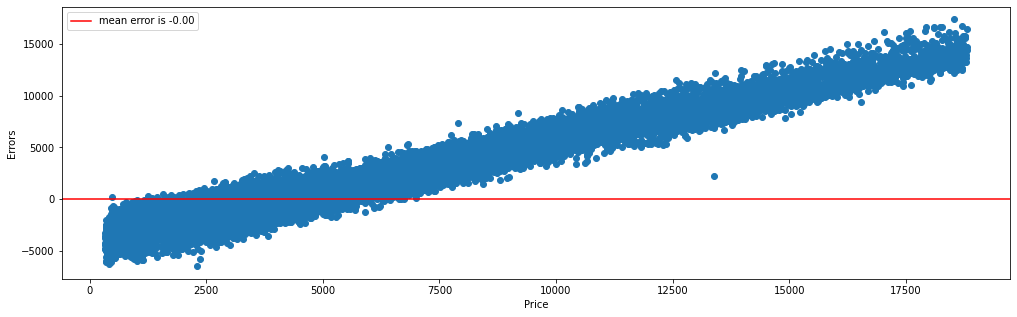

In [ ]:
# Create a scatter plot between the errors and the dependent variable for the train set.

plt.figure(figsize = (17,5))
plt.scatter(y_train_reshaped,y_train_error)
plt.axhline(np.mean(y_train_error),color = 'red',label = f'mean error is {np.mean(y_train_error):.2f}')
plt.ylabel('Errors')
plt.xlabel('Price')
plt.legend()
plt.show()


**Q:** Do you find any pattern or trend in the scatter plot? Whether the residuals exhibit constant variance around mean of errors?

**A:** As the value of price increases the error is also increasing. 



---